# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = \mathbb{E}(a^2X^2-2aXY+Y^2)=\mathbb{E}...$

$= R(a, a^*) = (a-1)^2+\sigma^2$

In our task we know $a^* = 1$.

In [1]:
def population_risk(a, sigma_eps=1):
    
    return (a-1)**2+sigma_eps**2

### b)

In [2]:
# sampling
import numpy as np
n=50
sigma_eps = 1
X = np.random.normal(0,1,n)
eps = np.random.normal(0, sigma_eps, n)
y= X+eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [3]:
def empirical_risk(a, x=X, y=y):
    n = len(y)
    return 1/n*np.sum((a*x-y)**2)

### c)

In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

a = np.arange(1-2, 1+2, 0.1)
x_min_pop = minimize(population_risk, 0,args=1).x
x_min_emp = minimize(empirical_risk, 0, args=(X,y)).x
y_min_pop = population_risk(x_min_pop)
y_min_emp = empirical_risk(x_min_emp)
y_min_mixed = population_risk(x_min_emp)

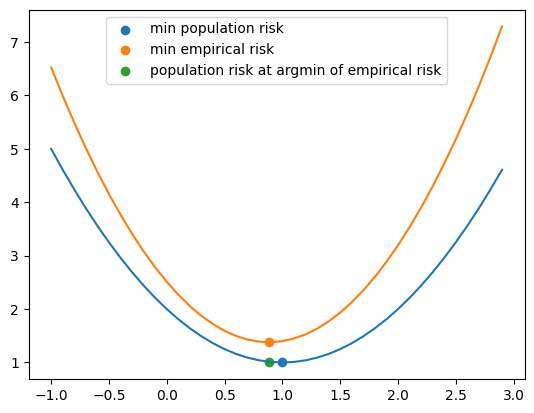

In [19]:
from matplotlib import pyplot as plt
a = np.arange(1-2, 1+2, 0.1)
pop_risks = population_risk(a, 1)
emp_risks = [empirical_risk(val,X, y) for val in a]
plt.plot(a, pop_risks, a, emp_risks)
plt.scatter(x_min_pop, y_min_pop, label='min population risk')
plt.scatter(x_min_emp, y_min_emp, label='min empirical risk')
plt.scatter(x_min_emp, y_min_mixed, label = 'population risk at argmin of empirical risk' )
plt.legend()

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [18]:
def excess_risk(a,a_0,sigma_eps):
    return population_risk(a,sigma_eps) - population_risk(a_0, sigma_eps)

In [22]:
# simulations with fixed sample size
a_0 = 1
sigma_eps = 1 
n = 200
risks = []
for _ in range(200):
        X = np.random.normal(0, 1, n)
        eps = np.random.normal(0,1, n)
        y = X + eps
        a  = minimize(empirical_risk, 0, args=(X,y)).x
        risks.append(excess_risk(a, a_0, sigma_eps))
print(f"n={n}, excess_risk: {np.mean(risks)}")

n=100, excess_risk: 0.008393993766790505


In [60]:
# simulations for various sample sizes
# simulations with fixed sample size
a_0 = 1
sigma_eps = 1 
n_s = np.arange(100,500,50)
risks =  [[] for _ in range(len(n_s))]
for i,n in enumerate(n_s):
    for _ in range(200):
            X = np.random.normal(0, 1, n)
            eps = np.random.normal(0,1, n)
            y = X + eps
            a  = minimize(empirical_risk, 0, args=(X,y)).x
            risks[i].append(excess_risk(a, a_0, sigma_eps)[0])
    print(f"n={n}, excess_risk: {np.mean(risks[i])}")

n=100, excess_risk: 0.010161591683056194
n=150, excess_risk: 0.00682922734249785
n=200, excess_risk: 0.005605930301587605
n=250, excess_risk: 0.0035682198067594996
n=300, excess_risk: 0.0034961318701939316
n=350, excess_risk: 0.0028998977367026835
n=400, excess_risk: 0.0029376130513837006
n=450, excess_risk: 0.0021144470988298425


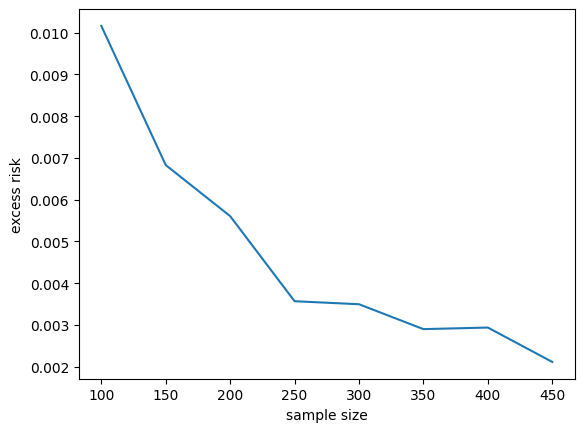

In [62]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)
mean_risks = [np.mean(risk) for risk in risks]
plt.ylabel('excess risk')
plt.xlabel('sample size')
plt.plot(n_s, mean_risks)